<a href="https://colab.research.google.com/github/Jair-RM/Simulacion-2-Figols/blob/main/Ejercicio_18_Oct_(Acciones_y_Euler_Murayama).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
from math import log, exp, sqrt, cos, acos, pi, sin, factorial
from statistics import mean, stdev, variance
from scipy.stats import norm, linregress
import random as rnd
from random import random, gauss
import numpy as np
import matplotlib.pyplot as plt
from time import time
from scipy.optimize import minimize
from numba import jit
# < > ∈ o ∉ |
#@jit(nopython=True)

In [ ]:
# a) El precio de una accion sigue un movimiento Browniano
#    geometrico, dPt = M*Pt*dt + Sigma*Pt*dWt, P0=15, M=0.002,
#    Sigma=0.01. Simule los valores P1, P2, ..., P50

# b) Con los valores obtenidos en a) y suponiendo que no conoces
#    los parametros, determine por el metodo del nucleo; compare
#    estos valores con los dados en a)

# c) Realice una prueba de hipotesis acerca de si el modelo
#    describe o no los datos

#  Pt = P0*e^[ (M - (sigma^2)/2)*t + Sigma*Wt ó por Euler Murayama

In [ ]:
# a) El precio de una accion sigue un movimiento Browniano
#    geometrico, dPt = M*Pt*dt + Sigma*Pt*dWt, P0=15, M=0.002,
#    Sigma=0.01. Simule los valores P1, P2, ..., P50

def Pt(P0, M, sigma, Wt):
  c = M - (sigma**2)/2
  c = c * t
  c = c + sigma*Wt
  Pt = P0*exp(c)
  P0=Pt
  return P0

P0=15
M=0.002
sigma=0.01
Wt=1
t=1
l=[]
N=50
dWt=t/N

for i in range(N):
  l.append(Pt(P0, M, sigma, Wt))

In [ ]:
# b) Con los valores obtenidos en a) y suponiendo que no conoces
#    los parametros, determine por el metodo del nucleo; compare
#    estos valores con los dados en a)



In [8]:
# c) Realice una prueba de hipotesis acerca de si el modelo
#    describe o no los datos


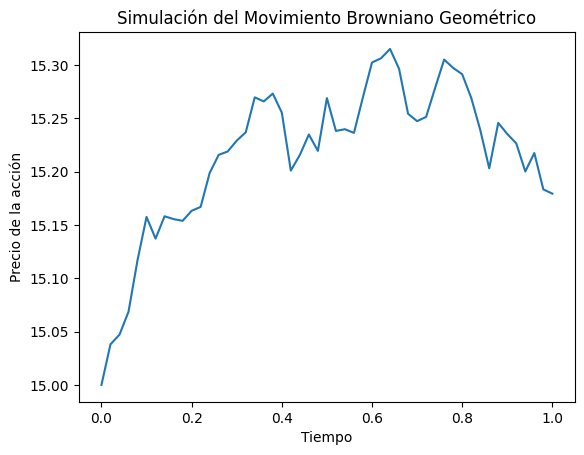

In [6]:
# Chat GPT
# a) El precio de una accion sigue un movimiento Browniano
#    geometrico, dPt = M*Pt*dt + Sigma*Pt*dWt, P0=15, M=0.002,
#    Sigma=0.01. Simule los valores P1, P2, ..., P50

import numpy as np
import matplotlib.pyplot as plt

# Parámetros
P0 = 15
M = 0.002
Sigma = 0.01
T = 1  # Tiempo total
N = 50  # Número de pasos
dt = T / N  # Tamaño del paso
np.random.seed(0)  # Para reproducibilidad

# Inicialización
P = np.zeros(N + 1)
P[0] = P0
t = np.linspace(0, T, N + 1)

# Simulación
for i in range(1, N + 1):
    dWt = np.random.normal(0, np.sqrt(dt))  # Incremento de Wiener
    P[i] = P[i-1] * np.exp((M - 0.5 * Sigma**2) * dt + Sigma * dWt)

# Visualización
plt.plot(t, P)
plt.title('Simulación del Movimiento Browniano Geométrico')
plt.xlabel('Tiempo')
plt.ylabel('Precio de la acción')
plt.show()

In [9]:
# b) Con los valores obtenidos en a) y suponiendo que no conoces
#    los parametros, determine por el metodo del nucleo; compare
#    estos valores con los dados en a)

# Estimación de parámetros
Y = np.log(P[1:] / P[:-1])
mu_Y = np.mean(Y) / dt
sigma_Y = np.std(Y) / np.sqrt(dt)

# Estimación de M y Sigma
M_est = mu_Y + 0.5 * sigma_Y**2
Sigma_est = sigma_Y

print(f"Estimación de M: {M_est}")
print(f"Estimación de Sigma: {Sigma_est}")




Estimación de M: 0.011952381553358675
Estimación de Sigma: 0.011255229205548426


In [10]:
# c) Realice una prueba de hipotesis acerca de si el modelo
#    describe o no los datos

from scipy import stats

# Prueba de Kolmogorov-Smirnov
D, p_value = stats.kstest(Y, 'norm', args=(mu_Y, sigma_Y))

print(f"Estadístico D: {D}, p-valor: {p_value}")

if p_value < 0.05:
    print("Rechazamos la hipótesis nula: el modelo no describe adecuadamente los datos.")
else:
    print("No se rechaza la hipótesis nula: el modelo describe adecuadamente los datos.")

Estadístico D: 0.7786536661144985, p-valor: 1.5122378207455997e-32
Rechazamos la hipótesis nula: el modelo no describe adecuadamente los datos.


[15.         15.24952498 15.21753476 15.13661211 15.04609236 15.38607038
 15.25544721 15.13316301 14.97476515 15.1650347  15.12478417 15.02005055
 15.2058038  15.1652415  15.23844694 15.35269584 15.36644251 15.49700084
 15.64822626 15.76202161 16.14038363 16.15683218 16.04426288 15.89975431
 16.10721374 15.9963766  16.21782558 16.19852271 16.29660823 16.09531294
 16.17997047] 31


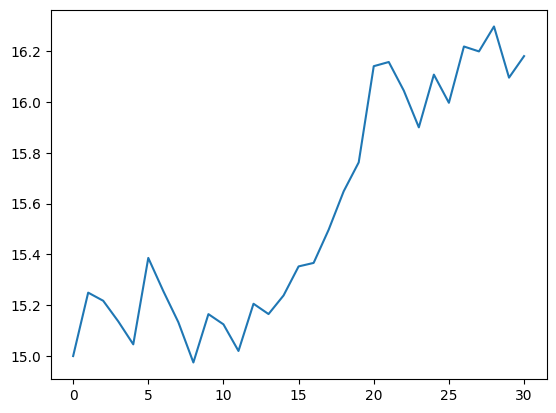

In [18]:
# Profesor

def gen(x0, u, o, n):
  l=np.zeros(31)
  l[0]=x0
  for i in range(30):
    ps=l[i]*exp((u-o**2/2)-o*gauss(0,1))
    l[i+1]=ps
  return l
u0=0.002
o0=0.01
x0=15
n=31
l=gen(x0,u0,o0,n)
print(l, len(l))
plt.plot(l)
plt.show()

[15.         15.01281814 15.04812856 15.27394361 15.53322929 15.42961466
 15.6362634  15.56942969 15.51995613 15.80305337 15.77841815 15.56834089
 15.61812557 15.71662543 15.84630193 16.15175822 16.18252224 16.10131944
 16.20488676 16.25423535 16.1034449  16.33306547 16.52040338 16.33976969
 16.22476465 15.90720646 15.87395119 15.81973115 15.62833561 15.51865131
 15.35010129] 31


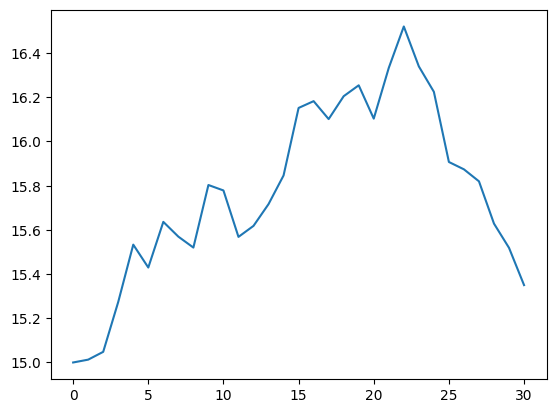

In [14]:
# Con Euler Murayama

def gen(x0, u, o, n, delta):
  oo=sqrt(delta)
  l=np.zeros(31)
  l[0]=x0
  for i in range(n - 1):
    z=l[i]
    t=0
    while t<1:
      z=z+ u*z*delta + o*z*oo*gauss(0,1)
      t=t+delta
    l[i+1]=z
  return l
u0=0.002
o0=0.01
x0=15
n=31
delta=0.001
l=gen(x0,u0,o0,n, delta)
print(l, len(l))
plt.plot(l)
plt.show()

[15.         15.02464602 15.1976384  15.06396106 15.13486279 14.86449058
 14.79872835 14.51913696 14.78505936 14.97763815 14.92836421 14.75702658
 14.97291802 14.96154981 14.84295986 14.7841687  14.76378281 14.82790457
 14.91744782 14.83175562 14.75325702 14.88337942 14.63639186 14.78621517
 14.89897115 14.78924505 14.85767841 15.00074691 15.00109722 14.91368351
 14.8428286 ] 31


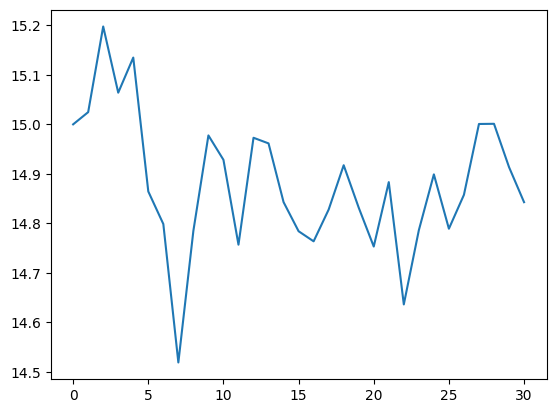

In [19]:
# Con   Winstein

def gen(x0, u, o, n, delta):
  oo=sqrt(delta)
  l=np.zeros(31)
  l[0]=x0
  for i in range(n - 1):
    z=l[i]
    t=0
    while t<1:
      w=oo*gauss(0,1)
      z=z+ u*z*delta + o*z*w + (1/2)*o*z*o*(w*2 - delta)  #G y la derivada de G, por eso hay doble o
      t=t+delta
    l[i+1]=z
  return l
u0=0.002
o0=0.01
x0=15
n=31
delta=0.001
l=gen(x0,u0,o0,n, delta)
print(l, len(l))
plt.plot(l)
plt.show()

In [ ]:
foto